In [2]:
import pandas as pd

In [6]:
df = pd.read_csv("../data/superstore.csv", encoding='latin1')

print("Superstore Data:")
print(df.head())

Superstore Data:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0  

In [5]:
df2 = pd.read_csv("../data/stores.csv")

print("Walmart Stores Data:")
print(df2.head())

df3 = pd.read_csv("../data/train.csv")
print("Walmart Train Sales Data:")
print(df3.head())

df4 = pd.read_csv("../data/test.csv")
print("Walmart Test Sales Data:")
print(df4.head())


df5 = pd.read_csv("../data/features.csv")
print("Walmart Features Data:")
print(df5.head())

df6 = pd.read_csv("../data/sampleSubmission.csv")
print("Walmart Store Features Data:")
print(df6.head())

Walmart Stores Data:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
Walmart Train Sales Data:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
Walmart Test Sales Data:
   Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False
Walmart Features Data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19


==== Dataset: Superstore ====
Shape: (9994, 21)
Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Data types:
 Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City         

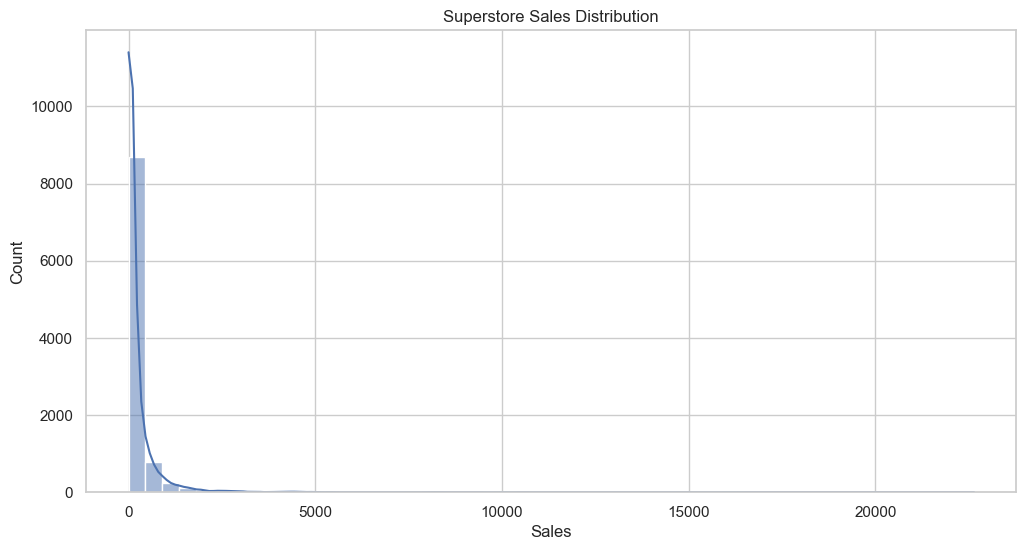

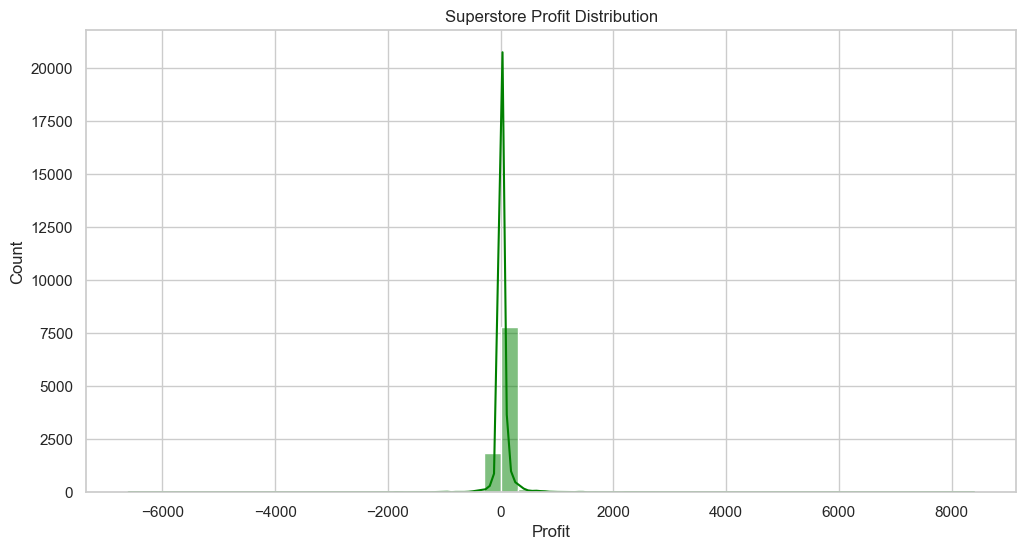

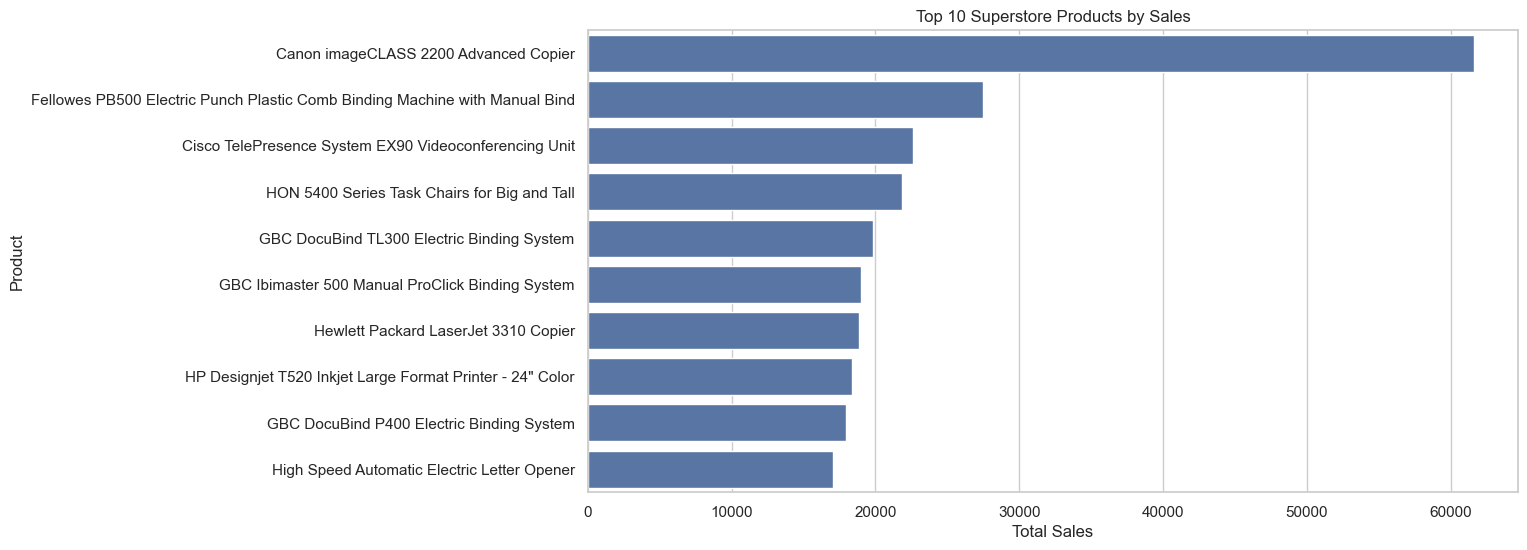

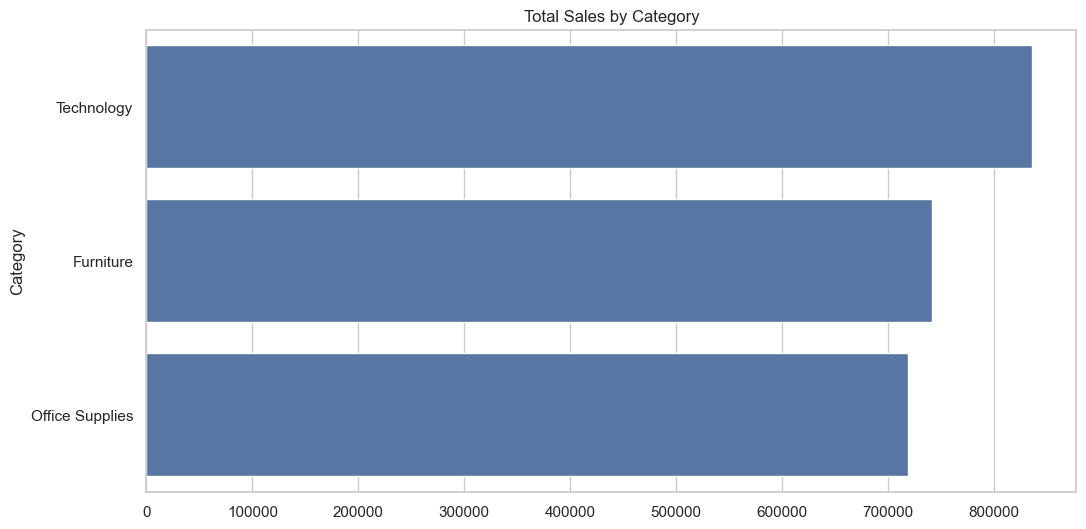

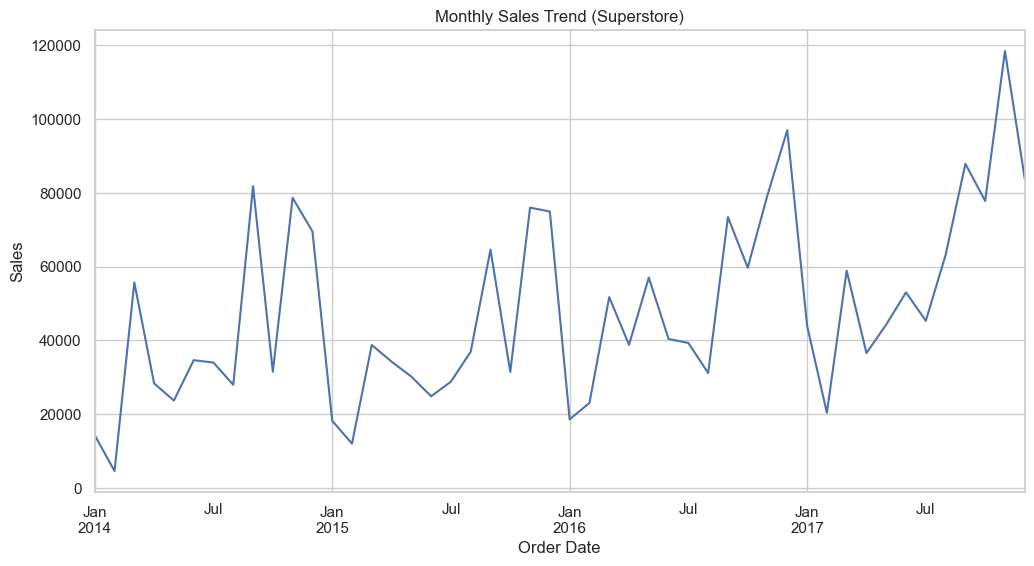

In [9]:
# eda.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# ===============================
# HELPER FUNCTION: overview
# ===============================
def overview(df, name):
    print(f"\n==== Dataset: {name} ====")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("\nMissing values:\n", df.isna().sum())
    print("\nData types:\n", df.dtypes)
    print("\nDescriptive statistics:\n", df.describe(include='all'))


# ===============================
# LOAD DATA
# ===============================
superstore = pd.read_csv("../data/superstore.csv", encoding="latin1")
stores = pd.read_csv("../data/stores.csv")
features = pd.read_csv("../data/features.csv")
walmart_train = pd.read_csv("../data/train.csv")
walmart_test = pd.read_csv("../data/test.csv")

# ===============================
# OVERVIEW
# ===============================
overview(superstore, "Superstore")
overview(stores, "Walmart Stores")
overview(features, "Walmart Features")
overview(walmart_train, "Walmart Train Sales")
overview(walmart_test, "Walmart Test Sales")


# ===============================
# EDA: SUPERSTORE
# ===============================
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'], errors='coerce')
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'], errors='coerce')

# 1. Sales Distribution
sns.histplot(superstore['Sales'], bins=50, kde=True)
plt.title("Superstore Sales Distribution")
plt.show()

# 2. Profit Distribution
sns.histplot(superstore['Profit'], bins=50, kde=True, color='green')
plt.title("Superstore Profit Distribution")
plt.show()

# 3. Top 10 Products by Sales
top_products = superstore.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Superstore Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()

# 4. Sales by Category
category_sales = superstore.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title("Total Sales by Category")
plt.show()

# 5. Monthly Sales Trend
superstore.set_index('Order Date', inplace=True)
monthly_sales = superstore['Sales'].resample('M').sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend (Superstore)")
plt.ylabel("Sales")
plt.show()
superstore.reset_index(inplace=True)



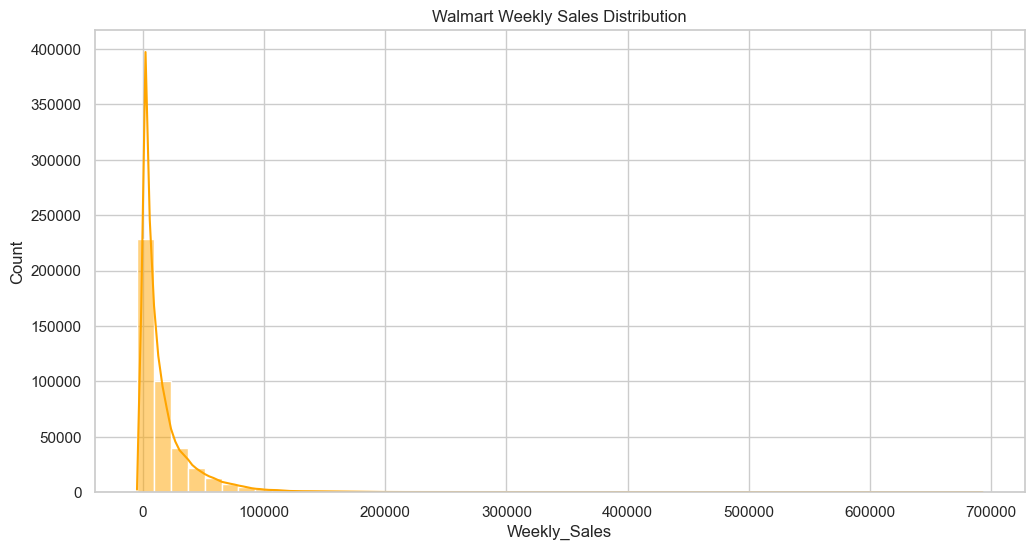

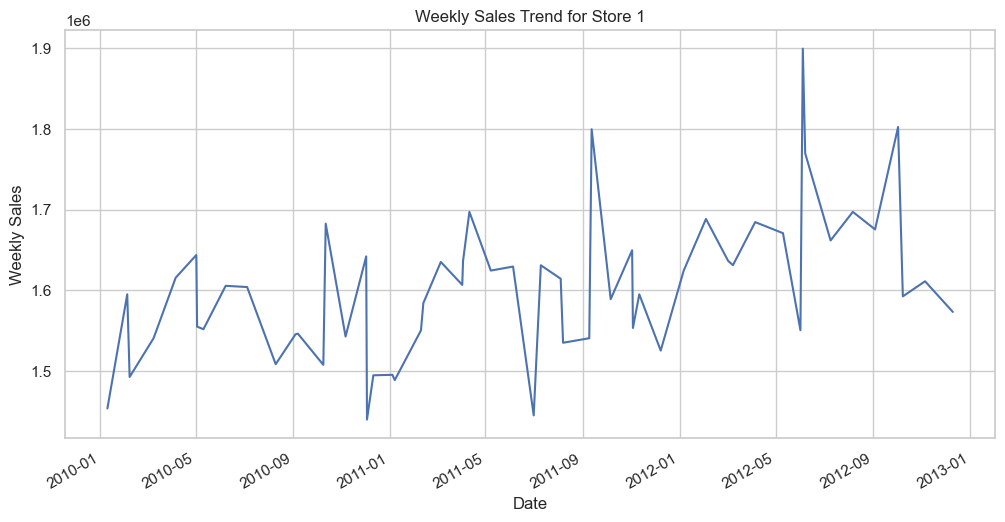

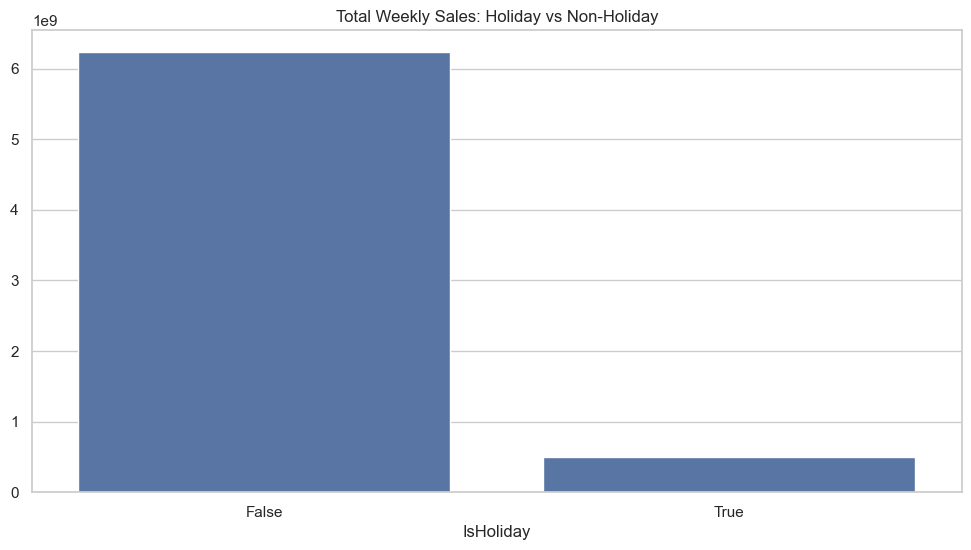

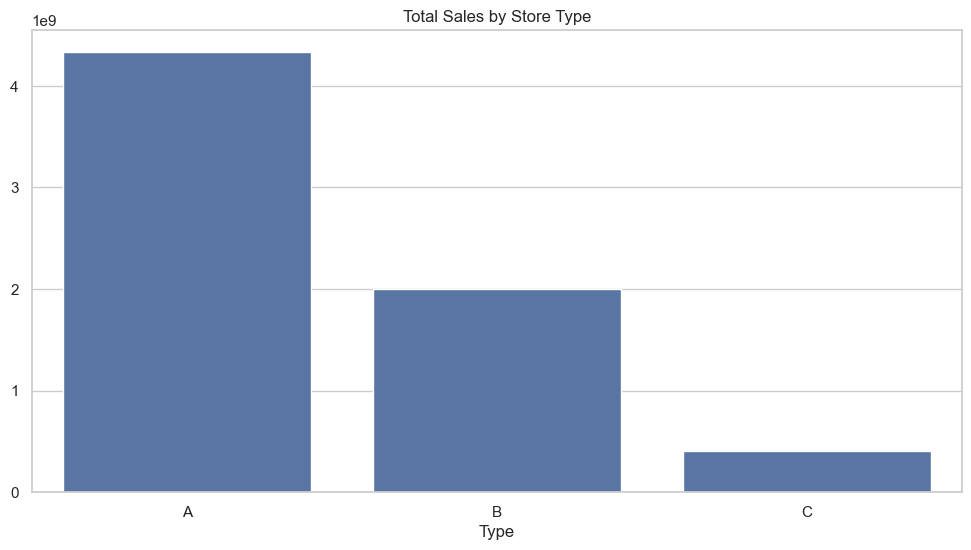

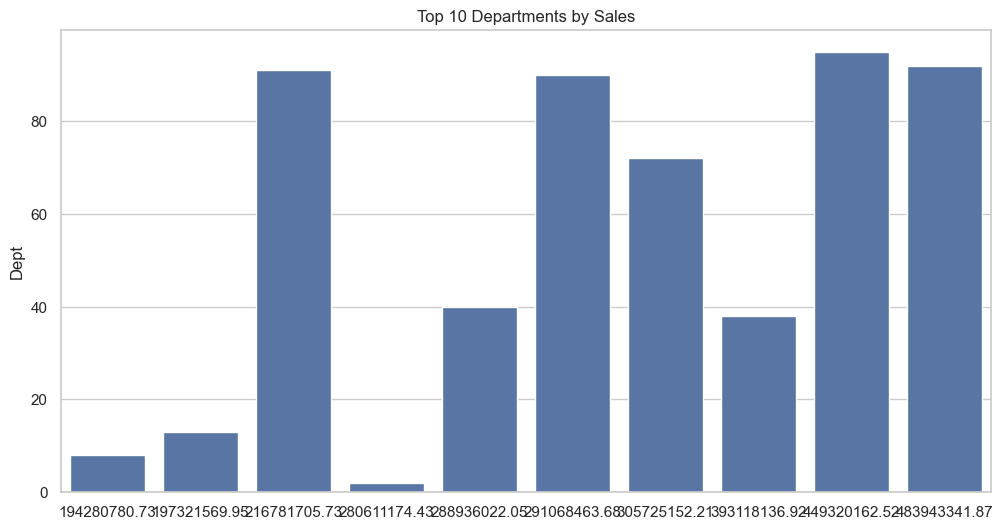

In [10]:

# ===============================
# EDA: WALMART
# ===============================
features['Date'] = pd.to_datetime(features['Date'], errors='coerce')
walmart_train['Date'] = pd.to_datetime(walmart_train['Date'], errors='coerce')
walmart_test['Date'] = pd.to_datetime(walmart_test['Date'], errors='coerce')

# 1. Weekly Sales Distribution
sns.histplot(walmart_train['Weekly_Sales'], bins=50, kde=True, color='orange')
plt.title("Walmart Weekly Sales Distribution")
plt.show()

# 2. Weekly Sales Trend for a Store
store_id = 1
store_sales = walmart_train[walmart_train['Store'] == store_id].groupby('Date')['Weekly_Sales'].sum()
store_sales.plot()
plt.title(f"Weekly Sales Trend for Store {store_id}")
plt.ylabel("Weekly Sales")
plt.show()

# 3. Holiday Impact
holiday_sales = walmart_train.groupby('IsHoliday')['Weekly_Sales'].sum()
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title("Total Weekly Sales: Holiday vs Non-Holiday")
plt.show()

# 4. Store Type Sales
store_sales_summary = walmart_train.merge(stores, left_on='Store', right_on='Store')
store_type_sales = store_sales_summary.groupby('Type')['Weekly_Sales'].sum()
sns.barplot(x=store_type_sales.index, y=store_type_sales.values)
plt.title("Total Sales by Store Type")
plt.show()

# 5. Top Departments by Sales
top_depts = walmart_train.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_depts.values, y=top_depts.index)
plt.title("Top 10 Departments by Sales")
plt.show()




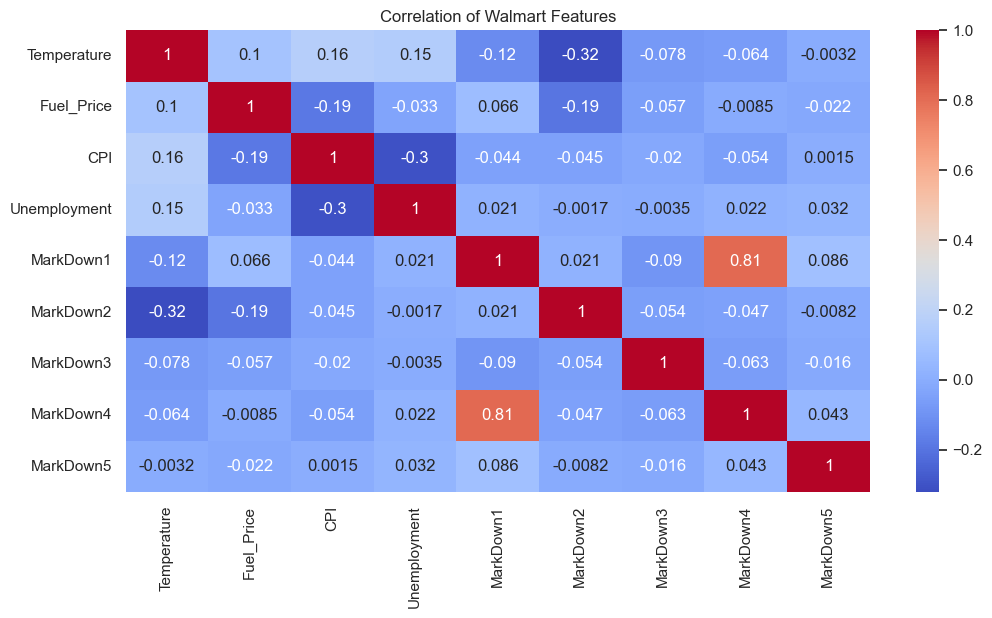

In [11]:
# ===============================
# FEATURE CORRELATION (Walmart)
# ===============================
numeric_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
corr = features[numeric_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Walmart Features")
plt.show()


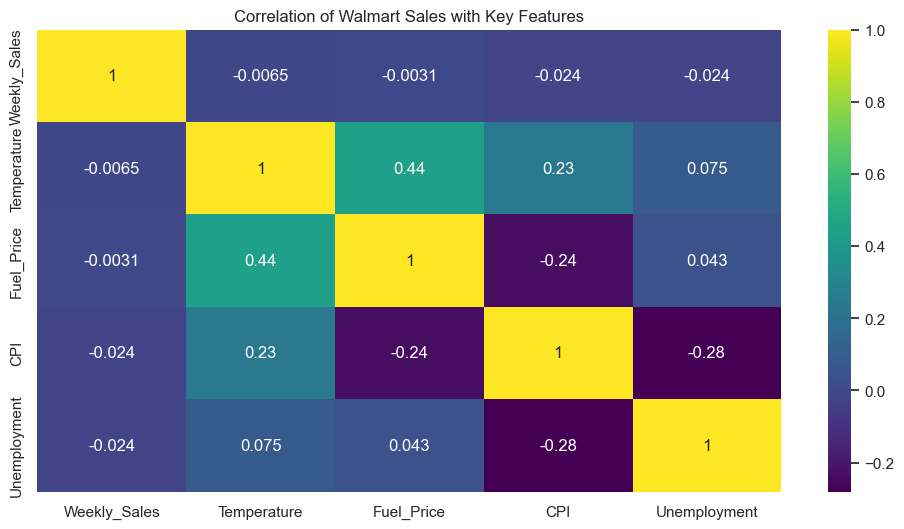

In [12]:
# ===============================
# FEATURE CORRELATION WITH SALES (Walmart)
# ===============================
# Merge Walmart train and features
walmart_data = walmart_train.merge(features[['Store', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']],
                                   on=['Store', 'Date'], how='left')

numeric_features = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr = walmart_data[numeric_features].corr()

sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Correlation of Walmart Sales with Key Features")
plt.show()
